In [127]:
import json  
import zipfile
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
d = None  
data = None  
with zipfile.ZipFile("/home/wenbenc/two-sigma-connect-rental-listing-inquiries/train.json.zip", "r") as z:
    for filename in z.namelist():
        print(filename)
        with z.open(filename) as f:
            data = f.read()
            d = json.loads(data.decode("utf-8"))

train.json


In [129]:
# Constructing DataFrame my_df from a dictionary d
my_df = pd.DataFrame(d)

In [130]:
# Find the words that appears 20000 times in original data
special = pd.DataFrame(my_df.features.tolist()).stack().value_counts()
special = Features[Features>20000]
print(special)

Elevator           25915
Cats Allowed       23540
Hardwood Floors    23527
Dogs Allowed       22035
Doorman            20898
Dishwasher         20426
dtype: int64


In [131]:
# Insert extra fetures by special to original data
my_df.insert(0,"Elevator Available", 0)
my_df.insert(0,"Cats Allowed", 0)
my_df.insert(0,"Hardwood Floors Available", 0)
my_df.insert(0,"Dogs Allowed", 0)
my_df.insert(0,"Doorman Available", 0)
my_df.insert(0,"Dishwasher Available", 0)
my_df.features = my_df.features.astype(str)

In [132]:
# Add value 1 if attribute Avaliable/Allowed in original dat
my_df.loc[my_df['features'].str.contains('Elevator'), 'Elevator Available'] = 1
my_df.loc[my_df['features'].str.contains('Cats Allowed'), 'Cats Allowed'] = 1
my_df.loc[my_df['features'].str.contains('Hardwood Floors'), 'Hardwood Floors Available'] = 1
my_df.loc[my_df['features'].str.contains('Dogs Allowed'), 'Dogs Allowed'] = 1
my_df.loc[my_df['features'].str.contains('Doorman'), 'Doorman Available'] = 1
my_df.loc[my_df['features'].str.contains('Dishwasher'), 'Dishwasher Available'] = 1

In [133]:
# Import the data of NYC Transit Subway Entrance And Exit Data
data = pd.read_csv("/home/wenbenc/NYC_Transit_Subway_Entrance_And_Exit_Data.csv")

In [134]:
# print out the Transit Data
print(data)

     Division               Line        Station Name  Station Latitude  \
0         BMT           4 Avenue             25th St         40.660397   
1         BMT           4 Avenue             25th St         40.660397   
2         BMT           4 Avenue             36th St         40.655144   
3         BMT           4 Avenue             36th St         40.655144   
4         BMT           4 Avenue             36th St         40.655144   
...       ...                ...                 ...               ...   
1863      IRT  White Plains Road          Simpson St         40.824073   
1864      IRT  White Plains Road          Simpson St         40.824073   
1865      IRT  White Plains Road  Wakefield-241st St         40.903125   
1866      IRT  White Plains Road  Wakefield-241st St         40.903125   
1867      IRT  White Plains Road  Wakefield-241st St         40.903125   

      Station Longitude Route1 Route2 Route3 Route4 Route5  ...    ADA  \
0            -73.998091      R    NaN

In [135]:
# Print out the data
print(my_df)

        Dishwasher Available  Doorman Available  Dogs Allowed  \
4                          1                  0             1   
6                          1                  1             0   
9                          1                  1             0   
10                         0                  0             0   
15                         0                  1             0   
...                      ...                ...           ...   
124000                     1                  0             0   
124002                     0                  1             1   
124004                     1                  0             1   
124008                     1                  0             0   
124009                     1                  0             0   

        Hardwood Floors Available  Cats Allowed  Elevator Available  \
4                               1             1                   0   
6                               1             0                   1   
9     

In [136]:
# Seperate the data into training and testing sets
from sklearn.model_selection import train_test_split
# use number 0, 1, and 2 to determine 'low', 'medium' and 'high' of 'interest_level'
my_df['interest'] = my_df['interest_level'].apply(lambda t: 0 if t == 'low' else 1 if t == 'medium' else 2)

In [137]:
# Select 'bathrooms', bedrooms', 'lattice', 'longitude' and 'price' as features
x = my_df[['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price'] ]
# Select 'interest_level' as interest
y = my_df['interest']

In [138]:
# Select 20 percent attributes for testing and the rest 80 percent attributes for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [139]:
from sklearn.tree import DecisionTreeClassifier
# Classification use DecisionTreeClassifier from the tree library of sklearn
classifier = DecisionTreeClassifier()
# Train the decision tree 
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [140]:
# Make prediction of testing data
prediction = classifier.predict(x_test)

In [111]:
# Report the accuracy of decision tree
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      6916
           1       0.36      0.31      0.33      2209
           2       0.33      0.27      0.30       746

    accuracy                           0.67      9871
   macro avg       0.49      0.47      0.48      9871
weighted avg       0.66      0.67      0.66      9871



In [112]:
# Construct the decision tree using the Iris dataset
from sklearn.datasets import load_iris
from sklearn import tree
x, y = load_iris(return_X_y=True)
classifier = tree.DecisionTreeClassifier()

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

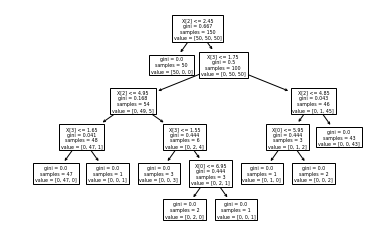

In [113]:
# Construct the Decision Tree
tree.plot_tree(classifier.fit(x,y)) 

In [173]:
# Make predicton of x_train and x_test
prediction1 = classifier.predict(x_train)
prediction2 = classifier.predict(x_test)

In [174]:
# Make confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix1 = confusion_matrix(y_train,prediction1)
confusionMatrix2 = confusion_matrix(y_test,prediction2)

In [175]:
total1 = sum(sum(confusionMatrix1))
total2 = sum(sum(confusionMatrix2))

In [177]:
#Calculate accuracy by confusion matrix
accuracy1 = (confusionMatrix1[0,0]+confusionMatrix1[1,1])/total1
accuracy2 = (confusionMatrix2[0,0]+confusionMatrix2[1,1])/total2

In [178]:
# Print out the accuracy1
print(accuracy1)

0.8618576023910235


In [179]:
# Print out the accuracy2
print(accuracy2)

0.6475534393678452


In [193]:
# Use pruning to reconstrct the decision tree
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [194]:
prediction3 = dtree.predict(x_train)
prediction4 = dtree.predict(x_test)

In [195]:
# Make confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix3 = confusion_matrix(y_train,prediction3)
confusionMatrix4 = confusion_matrix(y_test,prediction4)

In [196]:
total3 = sum(sum(confusionMatrix3))
total4 = sum(sum(confusionMatrix4))

In [197]:
#Calculate accuracy by confusion matrix
accuracy3 = (confusionMatrix3[0,0]+confusionMatrix3[1,1])/total3
accuracy4 = (confusionMatrix4[0,0]+confusionMatrix4[1,1])/total4

In [198]:
# Print out the accuracy3
print(accuracy3)

0.6965375750360933


In [199]:
# Print out the accuracy4
print(accuracy4)

0.6872657278897781


In [114]:
# modification: Use AdaBoost 
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

x, y = load_iris(return_X_y=True)
classifier = AdaBoostClassifier(n_estimators=100)

In [85]:
#modification: use Bagging (Bootstrap Aggregation) 
from sklearn.ensemble import BaggingClassifier
classifer = BaggingClassifier(classifier, n_estimators = 100, max_samples = 0.8, random_state=1)
classifer.fit(x, y)

BaggingClassifier(base_estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                    base_estimator=None,
                                                    learning_rate=1.0,
                                                    n_estimators=100,
                                                    random_state=None),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.8, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=1, verbose=0, warm_start=False)

In [22]:
# Cross-validation using k-fold (10-fold)
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np 
scores = []
# Using the RBF kernel of the SVR model
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x):
    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    best_svr.fit(x_train, y_train)
    scores.append(best_svr.score(x_test, y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [23]:
#list of r2 scores
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
cross_val_score(best_svr, x, y, cv=10)

array([0.        , 0.        , 0.        , 0.78806464, 0.        ,
       0.        , 0.85989024, 0.        , 0.        , 0.        ])

In [89]:
# modification: Use Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier= classifier.fit(x, y)

In [115]:
from sklearn.tree import DecisionTreeClassifier
# Train the decision tree 
classifier.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [116]:
# Make prediction of testing data
prediction = classifier.predict(x_test)

In [117]:
# Print out the accuracy and f1-score after modification
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84      6916
           1       0.43      0.10      0.16      2209
           2       0.56      0.17      0.26       746

    accuracy                           0.72      9871
   macro avg       0.57      0.41      0.42      9871
weighted avg       0.65      0.72      0.64      9871



In [118]:
# Construct the decision tree using the Iris dataset
from sklearn.datasets import load_iris
from sklearn import tree
x, y = load_iris(return_X_y=True)
classifier = tree.DecisionTreeClassifier()

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

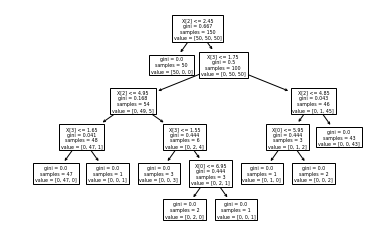

In [120]:
# Construct the decision tree after modification
tree.plot_tree(classifier.fit(x,y)) 